# Week6: Visualization and analysis


本周我们将通过实验学习以下内容：
1. 可视化工具Tensorboard以及Matplotlib的基本用法；
2. 在训练过程中通过Tensorboard可视化训练过程中的一些指标并分析；
3. 使用Matplotlib可视化神经网络学习的特征；
4. 评估分类模型一些常用的指标，以及如何计算它们。

#### 本周有五个小作业插入在本文档中，请注意完成。提交作业时需要在本ipynb文件上完成作业，并将本文件夹打包成压缩包并提交，压缩包命名为week6\_姓名\_学号.zip。本周由TA\_毛伊凡以及TA\_汪思达负责，如果遇到任何问题请在课程微信群中@TA\_毛伊凡。

In [ ]:
%load_ext autoreload
%autoreload 2

## 1. Tensorboard的基本用法
Tensorboard是我们在深度学习中常用的可视化训练过程的工具，要使用Tensorboard，我们首先安装它，在命令行下执行下面两行命令：

    pip install tensorboard
    pip install tensorboardX
    
安装好后我们就可以使用Tensorboard了，我们从一个非常简单的例子开始，我们在Tensorboard里画一条曲线：

In [ ]:
from tensorboardX import SummaryWriter

writer = SummaryWriter(log_dir='log/%s' % 'week6') # 我们将tensorboard产生的日志保存在log文件夹下，实验名称为week6
for i in range(100):
    writer.add_scalar(tag='test', scalar_value=i**0.5, global_step=i) # tag为该曲线的名字，scalar_value即y轴，global_step即x轴
writer.close()

运行完上面的代码后，我们在命令行下 (需要进入本文件所在的路径) 执行下面的命令：

    tensorboard --logdir log

运行成功后命令行界面中会出现Tensorboard的网址，在浏览器中访问该网址即可出现Tensorboard的界面，可以看到我们刚才所画的曲线：
![tsb](imgs/tsb.png)
我们可以在最左边的Runs选择不同的实验，将多次实验的曲线叠加显示在图上。在图上滑动即可查看曲线上某一点详细的值。这只是Tensorboard最基本的用法，你还可以使用add_image()添加图片，或者使用add_histogram()添加直方图等等。更多用法可在tensorboardX官方文档https://tensorboard-pytorch.readthedocs.io/en/latest/ 中找到。
### 保存曲线图
点击左侧的“显示数据下载链接”，然后在图下面选择要下载的数据即可。Tensorboard提供了csv和json两种数据格式。以csv为例，csv中包含了多个三元组，后两个Step和Value即为我们画图所需要的x轴和y轴的数据。
![sftsb](imgs/savefigtsb.png)
![csv](imgs/csv.png)

## 2. Matplotlib的基本用法
Matplotlib 是 Python 的绘图库。与 NumPy 一起使用，提供了一种有效的 MatLab 开源替代方案。在本周我们只介绍几个Matplotlib中常用的几个函数。更多的用法可以参考：https://matplotlib.org/api/pyplot_summary.html。
要使用Matplotlib，首先如果你还没有的话，先安装：

    pip install matplotlib

之后我们会介绍一些常用的图的画法，以及一些在使用Matplotlib画图中一些常用的小技巧（设置坐标轴、图例以及子图等）。

### 画曲线图
使用plot()函数，我们画一个简单的$y=x^2$的曲线图。

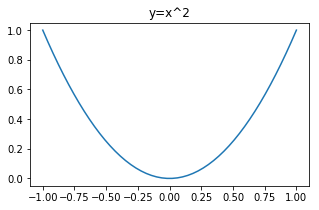

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure(figsize=(5,3)) # 创建一个figure，x轴方向大小为5，y轴方向大小为3
plt.title('y=x^2') # 设置图名
x = np.linspace(-1, 1, 50) # 在(-1, 1)之间均匀的取50个点
y = x ** 2
plt.plot(x, y)
plt.show()

### 画散点图
使用scatter()函数可以方便地可视化一些二维甚至三维的点。这在可视化神经网络提取的特征时十分有效(由于网络输出的特征维度通常很大，一般需要使用PCA或者t-SNE等降维技术先将特征维度降低再可视化)。在下面的例子中我们使用numpy的random模块随机产生一些点并显示出来。

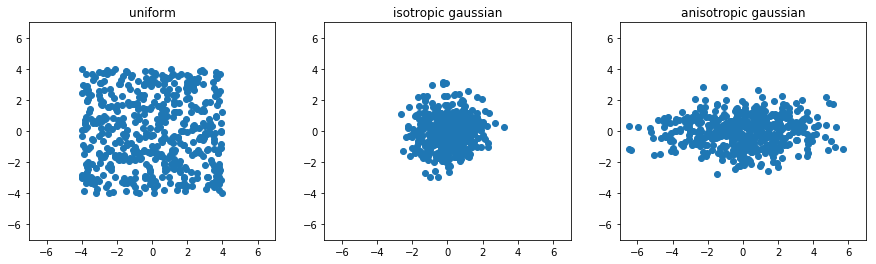

In [2]:
fig2 = plt.figure(figsize=(15,4))
# 使用subplot()可在一个figure中画多个子图
plt.subplot(131) # 参数131表示1行3列的图中的第1个子图
plt.title('uniform')
# 在(-4, 4)间取500个均匀分布的二维的点
uniform = np.random.uniform(-4, 4, (500, 2))
plt.xlim(-7, 7) # 设置x轴坐标范围
plt.ylim(-7, 7) # 设置y轴坐标范围
plt.scatter(uniform[:,0], uniform[:,1]) # 第一个参数为所有点的x轴坐标，第二个为y轴坐标

plt.subplot(132) # 参数132表示1行3列的图中的第2个子图
plt.title('isotropic gaussian')
# 从均值在每一维上都为0，协方差矩阵为2阶单位矩阵的多元高斯分布中采样500个点。
gaussian_2d = np.random.randn(500, 2)
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.scatter(gaussian_2d[:,0], gaussian_2d[:,1])

plt.subplot(133) # 参数133表示1行3列的图中的第3个子图
plt.title('anisotropic gaussian')
# 从均值在每一维上都为0，协方差矩阵为对角阵diag(5,1)的多元高斯分布中采样500个点。
gaussian_2d = np.random.multivariate_normal(mean=[0, 0], cov=[[5,0],[0, 1]], size=500)
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.scatter(gaussian_2d[:,0], gaussian_2d[:,1])
plt.show()


### 画直方图
直方图是可视化数据分布的一种比较直观的工具。在下面的例子中我们生成两个1维的高斯分布，并在直方图上可视化出来。

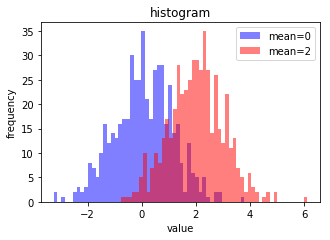

In [3]:
fig3 = plt.figure(figsize=(5,3.3))
plt.title('histogram')
gaussian_1d = np.random.randn(500) # 均值为0，方差为1的高斯分布
gaussian_1d_2 = np.random.randn(500) + 2 # 均值为2，方差为1的高斯分布
plt.xlabel('value') # 设置x轴标签
plt.ylabel('frequency') # 设置y轴标签
plt.hist(gaussian_1d, bins=50, alpha=0.5, color='blue', label='mean=0') # bins为柱形的最大数量，设置label以便显示图例
plt.hist(gaussian_1d_2, bins=50, alpha=0.5, color='red', label='mean=2')# 可以设置直方图的透明度为0.5，防止遮挡
plt.legend() # 给图加上图例
plt.show()

### 将figure保存为图片

In [ ]:
fig1.savefig('imgs/fig1.png')
fig2.savefig('imgs/fig2.png')
fig3.savefig('imgs/fig3.png')

### 显示图片及保存图片

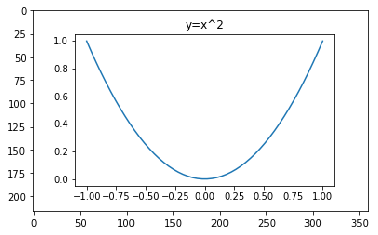

In [7]:
from PIL import Image
img = Image.open('imgs/fig1.png')
plt.imshow(img) # 显示图片
plt.show()

plt.imsave('imgs/fig1_.png', img) # 保存图片

## 3. 通过Tensorboard分析
在本节中我们将介绍使用Tensorboard可视化训练过程中的一些指标。我们使用的数据集是一个非常简化版的MNIST，只有数字0,1,2,3四类数据，数据量也减少了许多。使用的网络是一个四层的全连接网络。由于数据集和网络都非常简单下面的程序在cpu上运行也只需要不到一分钟。
### 数据集划分
在正式进入本节之前，我们首先要介绍一下数据集的划分。在机器学习中，我们通常将数据集划分为三个部分：训练集、验证集和测试集。
![tvt](imgs/tvt.png)
- 训练集：
训练集顾名思义就是用来训练模型的数据集，用来更新模型的参数。不过对于神经网络来说，在训练集上过拟合是非常容易的，只使用训练集对模型评估无法知道模型的泛化性能(在没用来训练的数据上的表现)，这就引入了验证集和测试集。
- 验证集：
验证集是用来调整训练中各种超参数的数据集，比如学习率、全连接网络的隐层个数等等。使用验证集同时也可避免模型出现过拟合：我们在训练过程中每个epoch都在用验证集来测试一下模型的表现，如果出现loss升高或者准确率下降，那么说明出现了过拟合，我们可以在这里停止训练，这就是早停(early stopping)。
- 测试集：
验证集虽然没有用来更新模型的参数，但是它也参与了训练，我们仍然需要模型完全没有见过的数据来评估模型的泛化性能。在验证集上调整超参数之后，最后我们再在测试集上评估模型的性能。

### Tensorboard可视化
在下面我们完成了一整套训练-验证-测试的流程。请通过下面代码了解Tensorboard的使用并完成作业1。

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from tensorboardX import SummaryWriter
from torch.utils import data
from torchvision import datasets, transforms

LR = 0 # change your learning rate here
EXPERIMENT = 'lr%s' % str(LR)

def get_dataloader(split='train'):
    """
    Arg:
        split: Dataset split. Should be 'train', 'valid' or 'test'.
    Return：
        dataloader: Dataloader to load the dataset.
    """
    transform = transforms.Compose([
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ])
    ds = datasets.ImageFolder('./dataset/'+split, transform=transform)
    dataloader = data.DataLoader(ds, batch_size=64, shuffle=True)
    return dataloader

class MLP(nn.Module):
    def __init__(self, n_hid=[128, 32], num_classes=4):
        super(MLP, self).__init__()
        self.ln1 = nn.Linear(28*28, n_hid[0])
        self.ln2 = nn.Linear(n_hid[0], n_hid[1])
        self.ln3 = nn.Linear(n_hid[1], num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.ln1(x))
        x = self.relu(self.ln2(x))
        x = self.ln3(x)
        return x
    
    def extract_feature(self, x):
        # we use the output of ln2 as the representation of x
        x = x.view(x.size(0), -1)
        x = self.relu(self.ln1(x))
        x = self.ln2(x)
        return x

def train():
    """ Train a model.
    """
    train_loader = get_dataloader('train')
    valid_loader = get_dataloader('valid')
    
    model = MLP()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)
    writer = SummaryWriter(log_dir='log/%s' % EXPERIMENT)
    
    for e in range(20):
        model.train()
        for (x, label) in train_loader:
            logits = model(x)
            loss = criterion(logits, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print('epochs:%d' % e)
        acc, avg_loss = evaluate(model, train_loader)
        writer.add_scalar('training acc', acc, e)
        writer.add_scalar('training loss', avg_loss, e)
        print('train:', acc, avg_loss)
        
        acc, avg_loss = evaluate(model, valid_loader)
        writer.add_scalar('validation acc', acc, e)
        writer.add_scalar('validation loss', avg_loss, e)   
        print('valid:', acc, avg_loss)
    
    writer.close()
        
    torch.save(model.state_dict(), 'model_%s.pth' % EXPERIMENT)

def evaluate(model, dataloader):
    """ Evaluate a model.
    Args:
        model: The model to be evaluated.
        dataloader: The dataset to evaluate on.
    Returns:
        bacc: Accuracy score. Scalar tyoe.
        avg_loss: Average loss. Scalar type.
    """
    model.eval()
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        y_true, y_pred, avg_loss = [], [], []
        for (x, label) in dataloader:
            logits = model(x)
            pred = logits.argmax(dim=1)
            y_pred.append(pred.cpu())
            y_true.append(label.cpu())

            loss = criterion(logits, label)
            avg_loss.append(loss.item())

        y_pred = np.concatenate(y_pred) # concatenate all the numpy arrays in the list
        y_true = np.concatenate(y_true)
        
        acc = np.sum((y_pred==y_true)) / y_true.shape[0]
        avg_loss = np.mean(avg_loss)
    
    return acc, avg_loss

def test(evaluate):
    model = MLP()
    model.load_state_dict(torch.load('model_%s.pth' % EXPERIMENT))
    test_loader = get_dataloader('test')
    acc, _ = evaluate(model, test_loader)
    print('test-set metric:', acc)


train()
test(evaluate)

运行代码的同时我们打开Tensorboard的网页，这样子在训练过程中我们就可以观察训练中准确率和损失的变化了，如下图：
![training](imgs/training.png)
### 作业1：分别设置三个不同的学习率，实现训练中欠拟合、过拟合和loss爆炸的情况，并将Tensorboard可视化结果保存下来（将三组实验的曲线叠加起来）。推荐直接把截图放在这行字下面，可以双击本代码块了解如何在notebook中添加图片。

## 4. 使用matplotlib可视化数据
在本节中我们使用上面介绍的scatter()函数可视化上面训练得到的神经网络学习到的MNIST图片的特征。我们使用网络倒数第二个全连接层的输出作为特征，注意到这一层的输出是32维的，这意味着我们将784维的MNIST数据映射到了一个32维的特征空间。由于我们无法直接可视化32维的特征，我们使用PCA或者t-SNE对特征进行降维。在下面的例子中我们抽取测试集中四类图像的特征表示，降维到2维并可视化出来。Python中的机器学习库sklearn提供了这两种降维方法，它同样可以通过pip命令安装：

    pip install scikit-learn

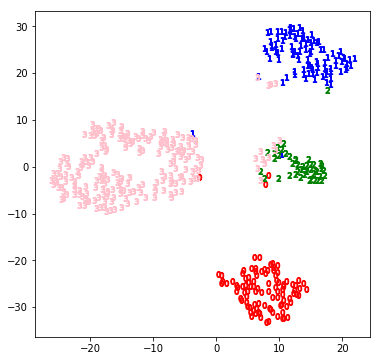

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

def visualize_feature():
    model = MLP()
    model.load_state_dict(torch.load('model_%s.pth' % EXPERIMENT))
    model.eval()
    
    test_loader = get_dataloader('test')
    
    with torch.no_grad():
        y_true, y_feature = [], []
        for (x, label) in test_loader:
            feature = model.extract_feature(x) # 从图像中提取32维的特征
            y_true.append(label)
            y_feature.append(feature)
        
        y_true = np.concatenate(y_true) # concatenate all the numpy arrays in the list
        y_feature = np.concatenate(y_feature)
        
        dr_model = TSNE(n_components=2) # initializing a dimension reduction model
        # dr_model = PCA(n_components=2) # t-SNE得到的结果通常更好看，但是速度更慢。你也可以尝试一下PCA。
        y_feature = dr_model.fit_transform(y_feature)
        
    colors = ['red', 'blue', 'green', 'pink']
    plt.figure(figsize=(6, 6))
    for i in range(4):
        # 画散点图，设置颜色，以及把标记样式设置为对应类别的数字。
        plt.scatter(y_feature[y_true==i, 0], y_feature[y_true==i, 1], color=colors[i], marker='$%d$'%i)
    plt.show()

visualize_feature()

## 5. 分类任务中的一些指标 
准确度（accuracy）是我们在分类中最常用的指标，在前面几周的实验中我们都使用了该指标作为评价模型的标准，它的定义如下所示。在一个二分类系统中，TP表示正例被分到正类的个数，TN表示负例被分到负类的个数，FP表示负例被分到正类的个数，FN表示正例被分到负类的个数。推广到多分类的情况下，如果设某类为正类，那么其余所有类即为该正类所对应的负类。
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$
accuracy这个指标十分直观且容易计算，只需要分类正确的样本数除以总样本数即可。但是这个指标也不总是有效的，试想下面这样的情形：我们有两类数据（0和1类），样本数分别为90和10，那么我们只需要将这100个样本全部分成0类那么我们的模型就有90%的准确率。虽然90%这个数字已经很高了，但是显然这样是不合理的。为了处理这样不均衡的问题，就引出了这两个指标：精确度（precision）和召回率（recall）:
$$
Precision = \frac{TP}{TP+FP} \\
Recall = \frac{TP}{TP+FN}
$$
注意到precision和recall是对某一类计算，而不是对整个分类系统计算的。简单来说，precision表示被分到该类的样本中，有多少是正确的；而recall表示该类所有的样本有多少是被正确分类的。对于上面那个例子，我们来计算一下每一类的precision和recall:
$$
Precision_0 = \frac{90}{90+10} = 0.9 \\
Recall_0 = \frac{90}{90+0} = 1.0 \\
Precision_1 = \frac{0}{0+0+10^{-6}}= 0 \\
Recall_1 = \frac{0}{0+10} = 0 \\
$$
在计算$Precision_1$时为了避免除以0我们在分母上加了一个很小的数，实际上在定义中当TP=0时precision就是为0的。在处理不均衡样本时，我们通常使用每一类平均的召回率（又称作balanced accuracy, bACC）来表示一个分类模型的性能：
$$
bACC = \frac{1}{C}\sum_{i=0}^C Recall_i
$$
显然在上面的例子中bACC=0.5，这对于一个二类的分类器是一个不及格的成绩。当然，要计算precision和recall要比计算accuracy麻烦许多，我们需要记录每一类的分类情况。所以我们通常用混淆矩阵（confusion matrix）来记录和显示每一类的分类情况，而且通过它也可以很方便的计算precision和recall。

我们举个例子来说明如何计算混淆矩阵，我们假设一个三类的分类问题，label和预测值如下：

In [1]:
y_true = [0, 0, 1, 1, 1, 2, 2, 2, 2]
y_pred = [1, 0, 2, 2, 1, 0, 2, 2, 2]

根据这组数据我们就能得到混淆矩阵，如下：
![cm](imgs/cm.png)
对于n类的数据，混淆矩阵就是$n\times n$的矩阵。可以看出混淆矩阵的纵轴表示实际的类别，横轴表示预测的类别，而矩阵中的值表示每种预测情况的计数。例如我们想知道矩阵中第二行第三列的值，就在上面的数组中找到y_true=1且y_pred=2的情况，我们发现这样的情况出现了两次（数组中第二和第三个元素），就将2填入矩阵的(1,2)位置中。

### 作业2：完成下面计算混淆矩阵的函数并输出。

In [2]:
import numpy as np
def confusion_matrix(y_true, y_pred):
    """
    Args:
        y_true: Label. List or numpy array with shape (n_samples,)
        y_pred: Prediction. List or numpy array with shape (n_samples,)
    Return:
        cm: Confusion matrix. A numpy array with shape (n_classes, n_classes).
    """
    # TODO
    # 提示：你首先需要知道y_true里包含了少类
    # for循环用的越少得分越高
    
    return cm

print(confusion_matrix(y_true, y_pred))

[[1 1 0]
 [0 1 2]
 [1 0 3]]


有了混淆矩阵之后我们就可以很方便的计算每一类的precision和recall了。在混淆矩阵中，对角线上的值即为每一类分类正确的数量，即每一类的TP；每行/每列不在对角线上的值之和即为每一类的FN/FP。所以计算第i类的recall只需要将第i行对角线上的值除以第i行所有元素之和，计算precision也同理。

### 作业3：计算每一类的precision和recall并输出。

In [7]:
def recall(y_true, y_pred):
    """
    Args:
        y_true: Label. List or numpy array with shape (n_samples,)
        y_pred: Prediction. List or numpy array with shape (n_samples,)
    Return:
        recall_list: The recall value of each class. List or numpy array with shape (n_classes, ).
    """
    cm = confusion_matrix(y_true, y_pred)
    recall_list = []
    # TODO
    # for循环用的越少得分越高
   
    return recall_list

def precision(y_true, y_pred):
    """
    Args:
        y_true: Label. List or numpy array with shape (n_samples,)
        y_pred: Prediction. List or numpy array with shape (n_samples,)
    Return:
        precision_list: The precision value of each class. List or numpy array with shape (n_classes, ).
    """
    cm = confusion_matrix(y_true, y_pred)
    precision_list = []
    # TODO
    # for循环用的越少得分越高
     
    return precision_list

r_list = recall(y_true, y_pred)
p_list = precision(y_true, y_pred)

for i in range(3):
    print('class:{} recall={:.2f} precision={:.2f}'.format(i, r_list[i], p_list[i]))

class:0 recall=0.50 precision=0.50
class:1 recall=0.33 precision=0.50
class:2 recall=0.75 precision=0.60


### 作业4：计算作业1中测试集上的每一类的precision、recall和总的balanced accuracy。

In [ ]:
def eval2(model, dataloader):
    """ Evaluate a model.
    Args:
        model: The model to be evaluated.
        dataloader: The dataset to evaluate on.
    Returns:
        bacc: Balanced accuracy score. Scalar tyoe.
        avg_loss: Average loss. Scalar type.
        r_list: Recall list.
        p_list: Precision list.
    """
    model.eval()
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        y_true, y_pred, avg_loss = [], [], []
        for (x, label) in dataloader:
            logits = model(x)
            pred = logits.argmax(dim=1)
            y_pred.append(pred.cpu())
            y_true.append(label.cpu())

            loss = criterion(logits, label)
            avg_loss.append(loss.item())

        y_pred = np.concatenate(y_pred)
        y_true = np.concatenate(y_true)
        
        # TODO
        # 计算测试集上的每一类的precision、recall和总的balanced accuracy
        r_list = None 
        p_list = None 
        bacc = None 
        avg_loss = np.mean(avg_loss)

    return bacc, avg_loss, r_list, p_list

test(eval2)

### 作业5：利用上面的函数重写训练过程，并使用作业1中达到过拟合效果的学习率重新训练模型。在Tensorboard中显示训练集、验证集和测试集的loss、每一类的recall和总的balanced accuracy随epoch变化的曲线。
在训练分类模型时，尤其是在不均衡数据集上训练时，知道每一类的recall和precision很重要，可以帮助我们了解模型在哪一类表现比较好，哪一类表现较差，从而帮助我们进一步改进模型。

In [ ]:
def train2():
    """ Train a model.
    """
    train_loader = get_dataloader('train')
    valid_loader = get_dataloader('valid')
    test_loader = get_dataloader('test')
    
    model = MLP()
    
    # TODO
    # 在Tensorboard中显示每一类的recall和总的balanced accuracy随epoch变化的曲线

train2()